In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
stocks_data = pd.read_csv("stock.csv",parse_dates=["Date"])
stocks_data.head()

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,2014-05-27,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
1,2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
2,2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
3,2014-05-30,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
4,2014-06-02,90.565712,90.690002,88.928574,89.807144,81.339699,92337700


In [3]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1510 non-null   datetime64[ns]
 1   Open Price       1510 non-null   float64       
 2   High Price       1510 non-null   float64       
 3   Low Price        1510 non-null   float64       
 4   Close Price      1510 non-null   float64       
 5   Adj Close Price  1510 non-null   float64       
 6   Volume           1510 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 82.7 KB


In [4]:
stocks = pd.DataFrame()
stocks["Date"] = stocks_data["Date"]
stocks["Apple"] = stocks_data["Adj Close Price"] 

In [5]:
stocks.tail(100)

,Date,Apple
1410,2019-12-31,292.163818
1411,2020-01-02,298.829956
1412,2020-01-03,295.924713
1413,2020-01-06,298.282715
1414,2020-01-07,296.879883
...,...,...
1505,2020-05-18,314.959991
1506,2020-05-19,313.140015
1507,2020-05-20,319.230011
1508,2020-05-21,316.850006


In [6]:
stocks["SMA30"] = stocks["Apple"].rolling(30).mean()
stocks["SMA100"] = stocks["Apple"].rolling(100).mean()

In [7]:
stocks.iloc[45:1105][["SMA30","SMA100"]]

,SMA30,SMA100
45,85.451217,NaN
46,85.554469,NaN
47,85.683382,NaN
48,85.824673,NaN
49,85.954191,NaN
...,...,...
1100,217.818307,197.786833
1101,218.066090,198.140902
1102,218.356853,198.536834
1103,218.248102,198.836724


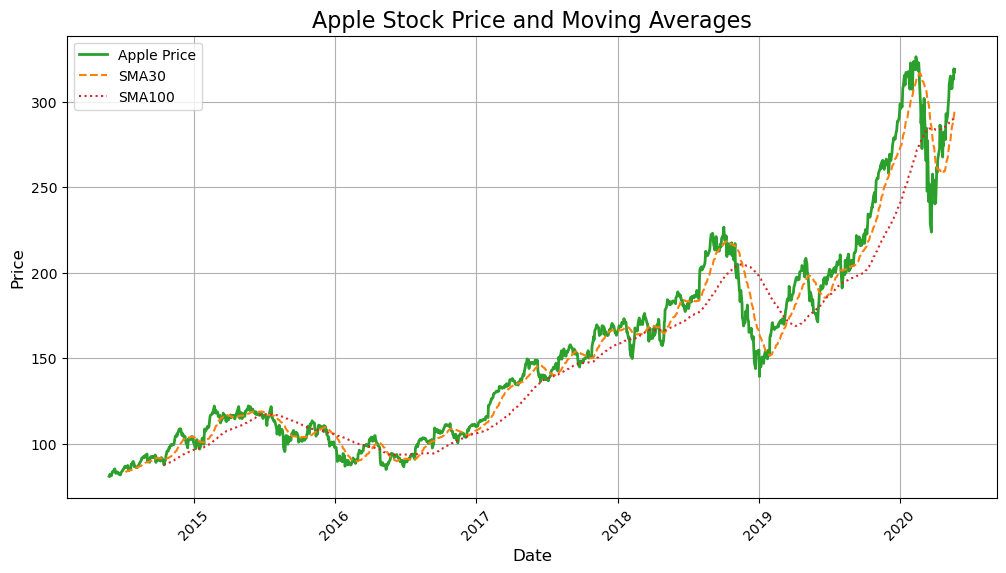

In [8]:
# Define data for the plot
dates = stocks["Date"]
apple_prices = stocks["Apple"]
sma30 = stocks["SMA30"]
sma100 = stocks["SMA100"]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))  # Set figure size

# Plot Apple prices with a thicker line and blue color
ax.plot(dates, apple_prices, linewidth=2, color='#2ca02c', label='Apple Price')

# Plot SMA30 with a dashed line and orange color
ax.plot(dates, sma30, linestyle='--', color='#ff7f0e', label='SMA30')

# Plot SMA100 with a dotted line and red color
ax.plot(dates, sma100, linestyle=':', color='#d62728', label='SMA100')

# Add title, labels, and grid
ax.set_title('Apple Stock Price and Moving Averages', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.grid(True)

# Add legend
ax.legend(loc='upper left')

# Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [9]:
stocks.iloc[300:350]

,Date,Apple,SMA30,SMA100
300,2015-08-04,105.653229,115.195253,116.708405
301,2015-08-05,106.353653,114.837977,116.637663
302,2015-08-06,106.585083,114.455236,116.556754
303,2015-08-07,106.946136,114.103270,116.460274
304,2015-08-10,110.834412,113.903954,116.389552
305,2015-08-11,105.066818,113.580584,116.270057
306,2015-08-12,106.686913,113.283568,116.181447
307,2015-08-13,106.603600,112.947832,116.079982
308,2015-08-14,107.353477,112.642008,115.990787
309,2015-08-17,108.464417,112.386732,115.943080


In [10]:
def buy_sell(df):
    buy_price=[] #
    sell_price=[]
    holding=[] #1 hold , 0 does not hold
    action=[]  #-1 sell, 1 buy, 0 hold 
    sig= 0 # doesnot buy any uptill now
    for i, rows in df.iterrows():
        if rows["SMA30"] > rows["SMA100"]:
            if sig !=1:
                buy_price.append(rows["Apple"])
                sell_price.append(np.nan)
                sig=1 #have bought
                holding.append(1)
                action.append(1)
            else:     # sig ==1 means we already have a stock
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                holding.append(1)
                action.append(0)
        elif rows["SMA30"] < rows["SMA100"]:
            if sig != -1:  #sig==1
                buy_price.append(np.nan)
                sell_price.append(rows["Apple"])
                sig=-1  # have sold
                holding.append(0)
                action.append(-1)
            else:  # sig !=1
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                holding.append(0)
                action.append(0)
                
                
        else:   # when rows["SMA30"]==rows["SMA100"]
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            holding.append(0)
            action.append(0)
            
    return buy_price, sell_price, holding, action

In [11]:
buy_sell(stocks)

([nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  88.782898,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,


In [12]:
stocks["Buy Price"], stocks["Sell Price"], stocks["Hold"], stocks["Actions"] = buy_sell(stocks)

In [13]:
pd.options.display.max_rows = None
stocks

,Date,Apple,SMA30,SMA100,Buy Price,Sell Price,Hold,Actions
0,2014-05-27,80.948952,NaN,NaN,NaN,NaN,0,0
1,2014-05-28,80.739334,NaN,NaN,NaN,NaN,0,0
2,2014-05-29,82.210480,NaN,NaN,NaN,NaN,0,0
3,2014-05-30,81.902557,NaN,NaN,NaN,NaN,0,0
4,2014-06-02,81.339699,NaN,NaN,NaN,NaN,0,0
5,2014-06-03,82.489952,NaN,NaN,NaN,NaN,0,0
6,2014-06-04,83.431915,NaN,NaN,NaN,NaN,0,0
7,2014-06-05,83.759270,NaN,NaN,NaN,NaN,0,0
8,2014-06-06,83.528938,NaN,NaN,NaN,NaN,0,0
9,2014-06-09,84.865509,NaN,NaN,NaN,NaN,0,0


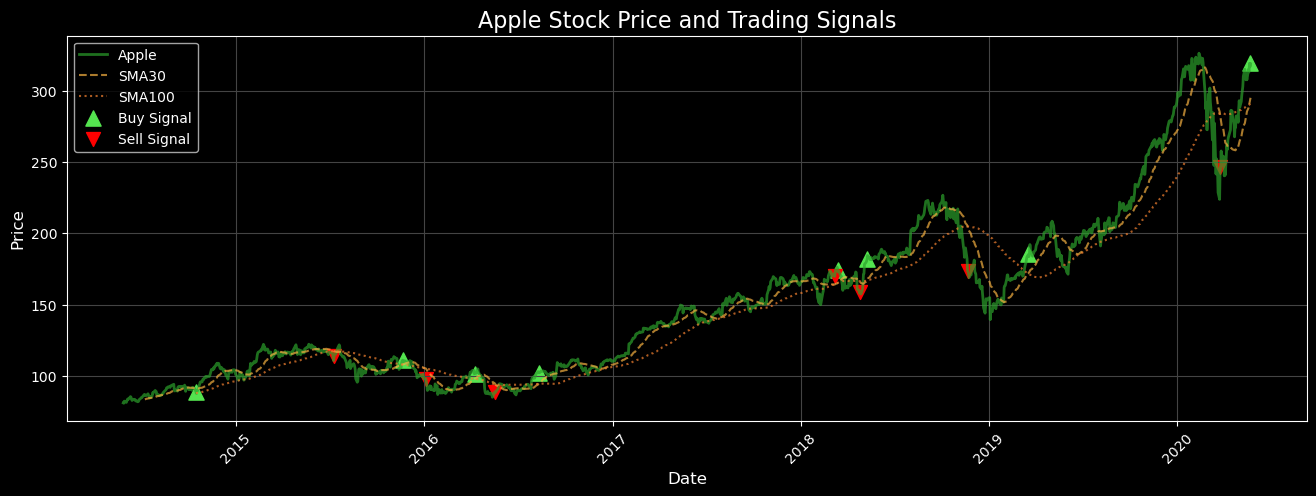

In [15]:
plt.figure(figsize=(16, 5))

# Set dark background
plt.style.use('dark_background')

# Plot Apple price with a thicker blue line
plt.plot(stocks["Date"], stocks["Apple"], label="Apple", alpha=0.7, linewidth=2, color='#2ca02c')

# Plot SMA30 with a dashed light orange line
plt.plot(stocks["Date"], stocks["SMA30"], label="SMA30", alpha=0.7, linestyle='--', color='#f5b041')

# Plot SMA100 with a dotted light red line
plt.plot(stocks["Date"], stocks["SMA100"], label="SMA100", alpha=0.7, linestyle=':', color='#f58231')

# Plot buy signals with brighter green triangles and slightly larger size
plt.scatter(stocks["Date"], stocks['Buy Price'], color="#54e34f", s=120, marker="^", label="Buy Signal")

# Plot sell signals with red triangles
plt.scatter(stocks["Date"], stocks['Sell Price'], color="red", s=100, marker="v", label="Sell Signal")

# Add title, labels, and grid
plt.title('Apple Stock Price and Trading Signals', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True, color='#444444')

# Adjust legend position and font size
plt.legend(loc='upper left', fontsize=10)

# Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=45)

# Show the plot
plt.show()